## Single Value Decomposition for Photo Storage 
### Avery Rogers

For this project, I will be investigating how much I can reduce the storage space needed to store a black-and-white photo and still have Apple's facial recognition system recognize that photo. I will be using Single Value Decomposition to reduce a photo to a lower-rank matrix of grey pixel values that can be stored in a fraction of the space as the original photo.

(1376, 1026, 4)


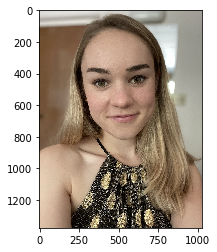

In [67]:
# We will use matplot lib here to load in our image as a vector representation 
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np

# load image as array of pixels of shape (width. height, channels)
image = image.imread('avery_photo.png')

# Investigate shape of pixel array 
print(image.shape)

# display the image as a pixel array
plt.imshow(image)
plt.show()

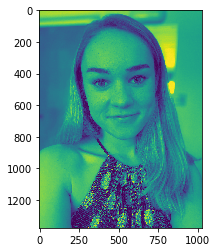

In [68]:
# Make the image black-and-white in order to operate on 2x2 matrix rather than 3x3 tensor
image = image[:,:,:3]
image = np.mean(image, axis = 2)
plt.imshow(image)
plt.show()

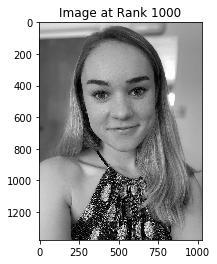

In [77]:
# Let's try SVD with half the rank of the original image!
new_ranks = [10, 25, 50, 100, 200, 500, 1000]
rank_images = {}

for new_rank in new_ranks:
    u, s, vh = np.linalg.svd(image)

    out_image_intermediate = np.matmul(u[:, :new_rank], np.diag(s[:new_rank]))
    out_image = np.matmul(out_image_intermediate, vh[:new_rank, :])
    out_image

    # readjust the pixel scales to get a black-and-white output rather than a greenish output
    scale = max(out_image.flatten()) - min(out_image.flatten())
    out_image = np.floor((out_image - min(out_image.flatten())) / scale * 255).astype(int)
    out_image = np.repeat(out_image, 3).reshape(out_image.shape[0], out_image.shape[1], -1)
    plt.title(f'Image at Rank {new_rank}')
    plt.imshow(out_image)
    save_image = np.uint8(out_image)
    plt.imsave(f'image_rank_{new_rank}.png', save_image)
    plt.savefig(f'graph_rank_{new_rank}.png')

I tried on a bunch of different ranks and imported them all into Photos. The smallest rank it recognized was rank 25, while the rank 10 photo was unrecognizable. 